In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
from cesium import datasets

eeg = datasets.fetch_andrzejak()

Loaded data from cached archive.


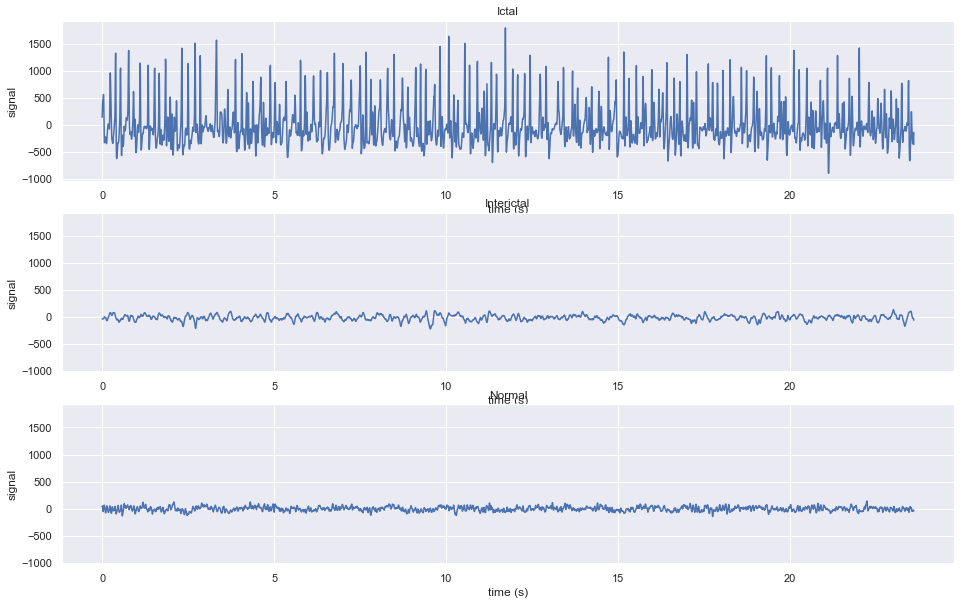

In [17]:
# Group together classes (Z, O), (N, F), (S) as normal, interictal, ictal
eeg["classes"] = eeg["classes"].astype("U16") #  allocate memory for longer class names
eeg["classes"][np.logical_or(eeg["classes"]=="Z", eeg["classes"]=="O")] = "Normal"
eeg["classes"][np.logical_or(eeg["classes"]=="N", eeg["classes"]=="F")] = "Interictal"
eeg["classes"][eeg["classes"]=="S"] = "Ictal"

fig, ax = plt.subplots(len(np.unique(eeg["classes"])), 1, sharey=True, figsize=(16,10))
for label, subplot in zip(np.unique(eeg["classes"]), ax):
    i = np.where(eeg["classes"] == label)[0][0]
    subplot.plot(eeg["times"][i], eeg["measurements"][i])
    subplot.set(xlabel="time (s)", ylabel="signal", title=label)

# Generate gaussian white noise

In [49]:
target_snr = 20
mu, sigma = 0, 50 # mean and standard deviation
x = len(eeg["times"][0])
y = np.random.normal(mu, sigma, x)

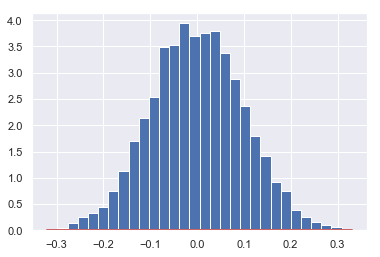

In [50]:
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

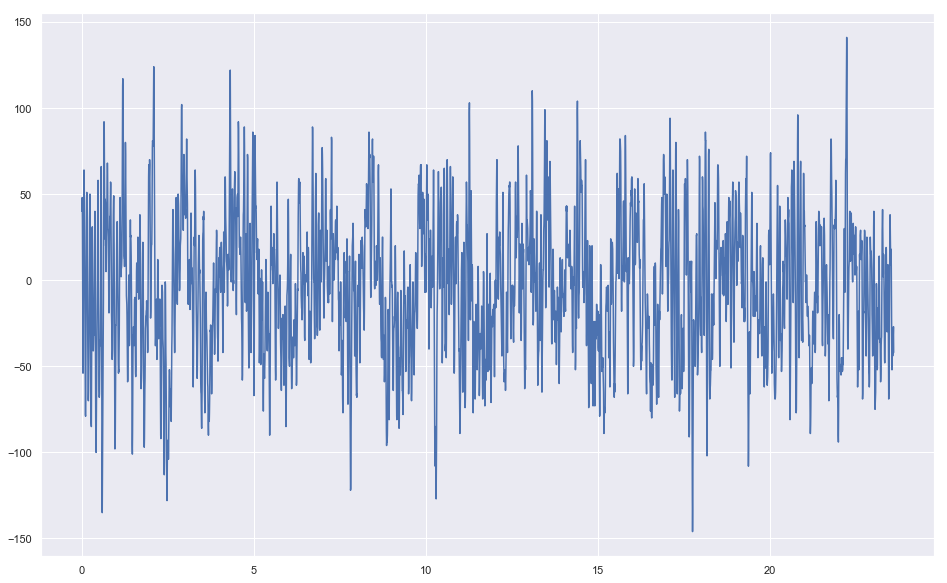

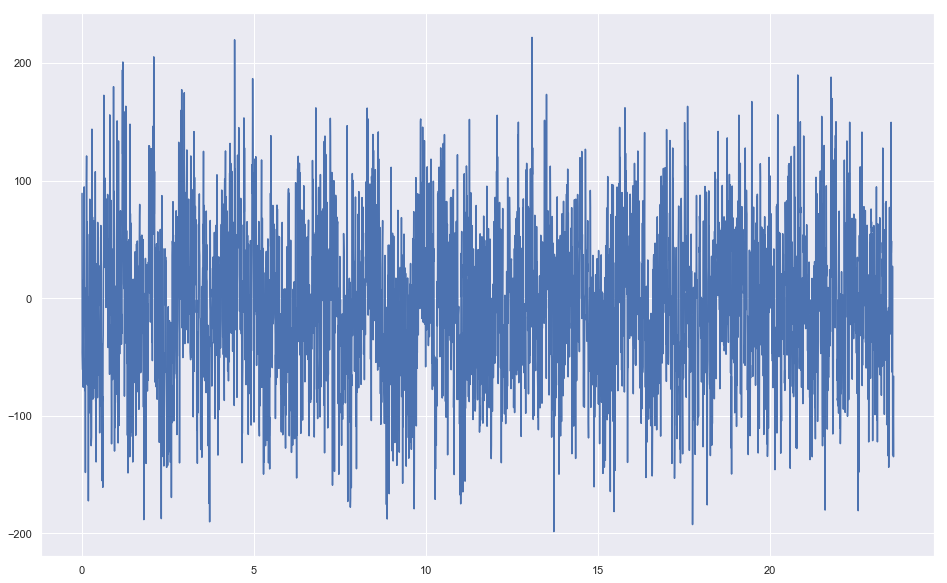

In [56]:
plt.figure(figsize=(16, 10))
plt.plot(eeg["times"][0], eeg["measurements"][0])
plt.show()

noisy = eeg["measurements"][0] + y

plt.figure(figsize=(16, 10))
plt.plot(eeg["times"][0], noisy)
plt.show()

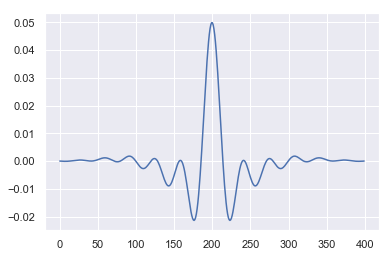

In [57]:
from scipy import signal

filter = signal.firwin(400, [0.01, 0.06], pass_zero=False)
plt.plot(filter)
plt.show()

In [58]:
cleaned = signal.convolve(noisy, filter, mode='same')

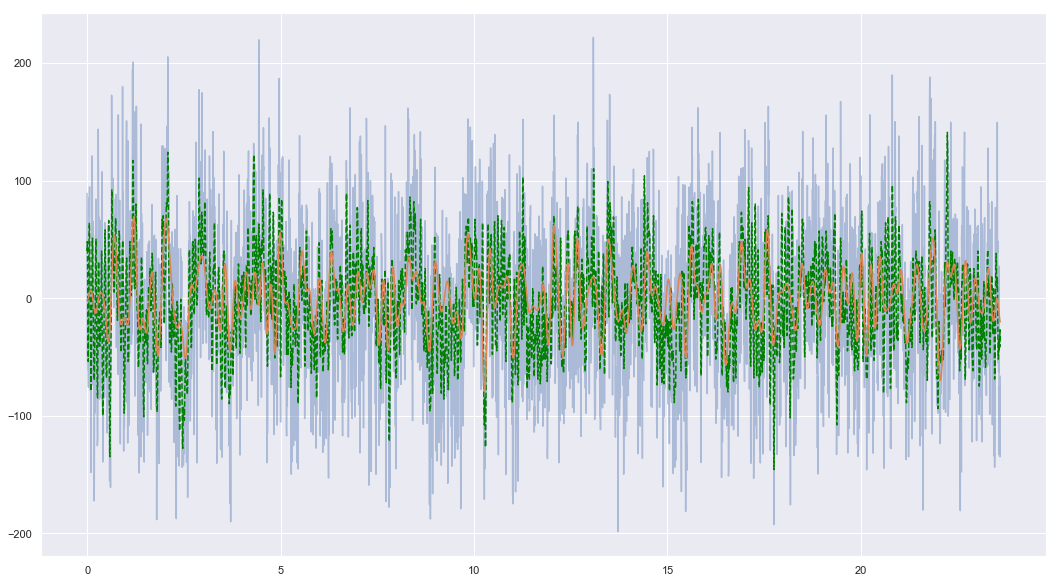

In [62]:
plt.figure(figsize=(18,10))
plt.plot(eeg["times"][0], noisy, alpha=0.4)
plt.plot(eeg["times"][0], eeg["measurements"][0], '--', color='green')
plt.plot(eeg["times"][0], cleaned)
plt.show()